# Import libraries and datasets

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [21]:
transactiondata = pd.read_excel('QVI_transaction.xlsx')

In [22]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8



## SUMMARIZATION

In [23]:
transactiondata.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Check missing data

In [24]:
transactiondata.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [25]:
# Look for duplicated TXN_ID

transactiondata[transactiondata.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [42]:
transactiondata_numerics_only = transactiondata.select_dtypes(include=np.number)
transactiondata_cat = set(transactiondata.columns) - set(transactiondata_numerics_only)

In [47]:
print("Numeric columns:\n",list(transactiondata_numerics_only))
print("Categorical columns:\n",list(transactiondata_cat))


Numeric columns:
 ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
Categorical columns:
 ['PROD_NAME']


## CHECKING FOR OUTLIERS

In [62]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

Text(0, 0.5, 'Total Sales)')

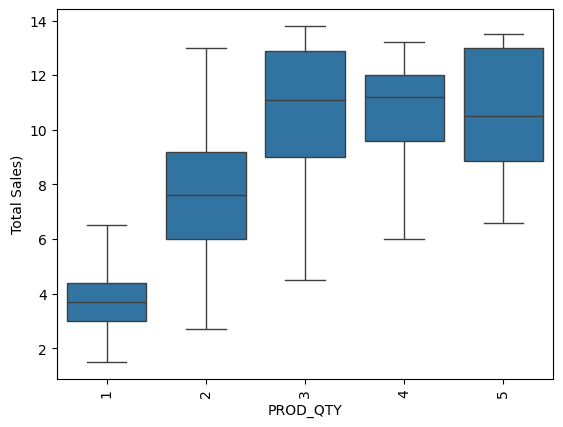

In [64]:
df_outlier_removed=remove_outlier_IQR(transactiondata.TOT_SALES)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=transactiondata.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=transactiondata.drop([ind_diff[i]])
    transactiondata=df_final
    
sns.boxplot(y='TOT_SALES', x='PROD_QTY',data=transactiondata)
plt.xticks(rotation=90)
plt.ylabel('Total Sales)')

In [79]:
print("Shape of dataset after treating outliers:",transactiondata.shape)

Shape of dataset after treating outliers: (264187, 8)


In [80]:
origin = pd.Timestamp("30/12/1899")
transactiondata["DATE"]=transactiondata["DATE"].apply(lambda x: origin + pd.Timedelta(days=x))
transactiondata

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


<Axes: xlabel='TOT_SALES', ylabel='Count'>

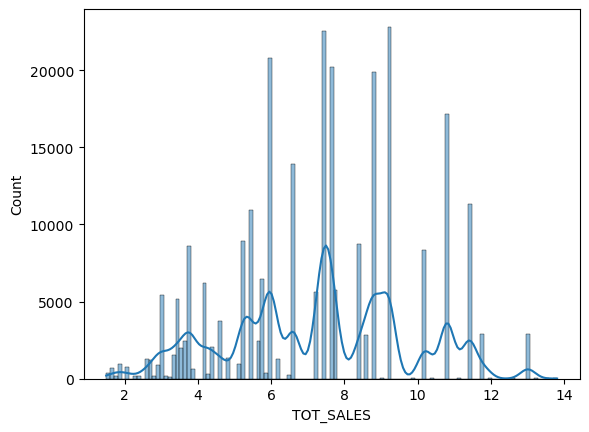

In [81]:
sns.histplot(transactiondata.TOT_SALES, kde = True)

In [82]:
numericdata = transactiondata.select_dtypes(['float', 'int'])

In [83]:
numericdata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
4,2,2426,1038,108,3,13.8
5,4,4074,2982,57,1,5.1


In [85]:
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
transactiondata['pack_size']=transactiondata['PROD_NAME'].apply(lambda x: find_number(x))
transactiondata


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


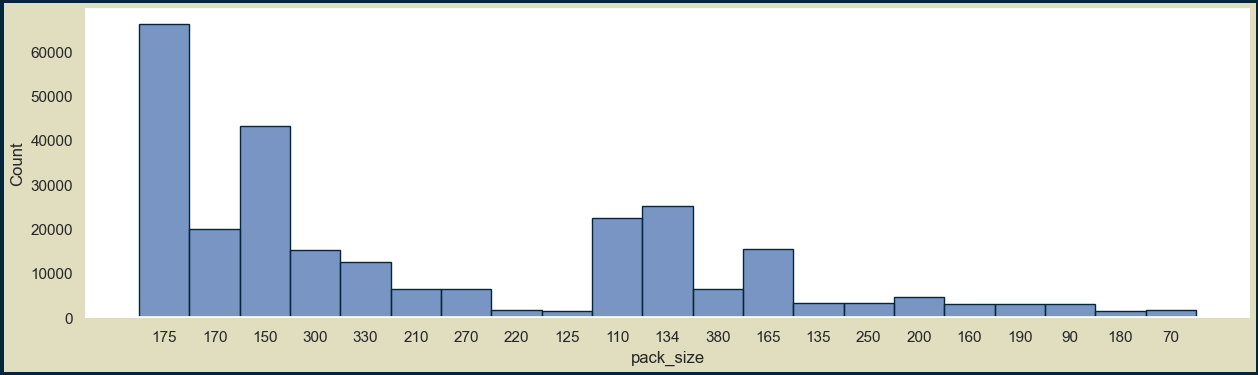

In [86]:
fig = plt.figure(figsize = (15,4), linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

sns.set(rc = {'figure.figsize':(15,4)})
ax = sns.histplot(data=transactiondata, x="pack_size",  edgecolor="#04253a")

ax.set_facecolor("#ffffff")

In [143]:
transactiondata['Brand Name'] = transactiondata['PROD_NAME'].str.split(' ').str[0]

In [144]:
transactiondata['Brand Name'].value_counts()

Brand Name
Kettle        41141
Smiths        28791
Pringles      25012
Doritos       24896
Thins         14049
RRD           11880
Infuzions     11035
WW            10320
Cobs           9669
Tostitos       9443
Twisties       9420
Old            9284
Tyrrells       6428
Grain          6258
Natural        6037
Red            5885
Cheezels       4583
CCs            4551
Woolworths     4437
Dorito         3175
Infzns         3138
Smith          2963
Cheetos        2921
Snbts          1576
Burger         1564
GrnWves        1465
Sunbites       1432
French         1418
NCC            1416
Name: count, dtype: int64

In [145]:
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('Red','RRD')
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('Woolworths','WW')
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('INFUZIONS','INFZNS')  
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('SMITHS','SMITH')
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('SUNBITES','SNBTS') 
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('DORITOS','DORITO')
transactiondata['Brand Name'] = transactiondata['Brand Name'].str.replace('GRNWVES','GRAIN')

In [146]:
transactiondata['Brand Name'].value_counts()

Brand Name
Kettle       41141
Smiths       28791
Pringles     25012
Doritos      24896
RRD          17765
WW           14757
Thins        14049
Infuzions    11035
Cobs          9669
Tostitos      9443
Twisties      9420
Old           9284
Tyrrells      6428
Grain         6258
Natural       6037
Cheezels      4583
CCs           4551
Dorito        3175
Infzns        3138
Smith         2963
Cheetos       2921
Snbts         1576
Burger        1564
GrnWves       1465
Sunbites      1432
French        1418
NCC           1416
Name: count, dtype: int64

## REMOVING OUTLIERS

In [87]:
x = numericdata[numericdata['TOT_SALES'] < 8000]

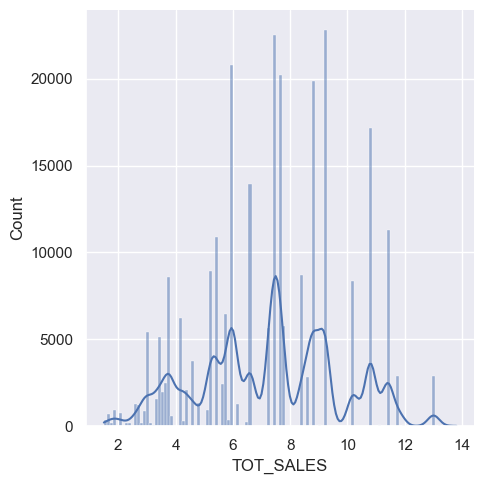

In [88]:
sns.displot(x.TOT_SALES, kde = True)

<Axes: ylabel='TOT_SALES'>

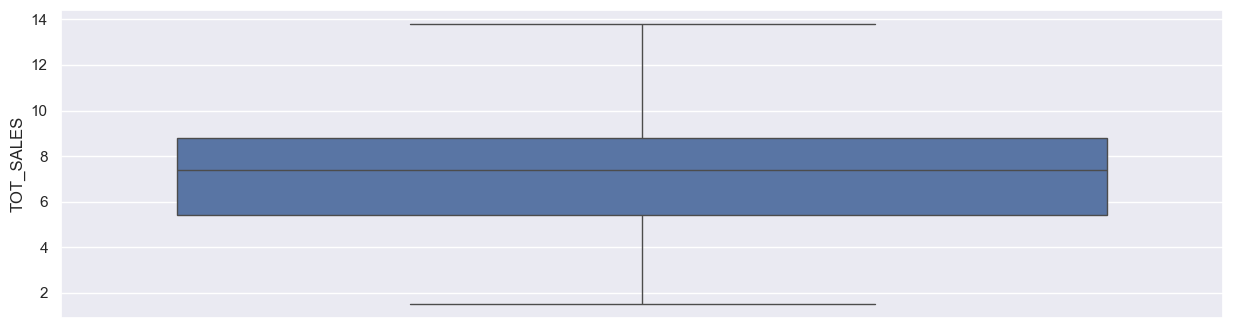

In [89]:
sns.boxplot(x.TOT_SALES)

## DATA FORMATS

In [90]:
transactiondata.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
pack_size                 object
dtype: object

In [91]:
customerdata = pd.read_csv('QVI_purchase_behaviour.csv')
customerdata

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


## Check for null Values in the data

In [92]:
customerdata.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [93]:
customerdata_numerics_only = customerdata.select_dtypes(include=np.number)
customerdata_cat = set(customerdata.columns) - set(customerdata_numerics_only)

In [94]:
print("Numeric Columns:\n",list(customerdata_numerics_only))
print("Categorical Columns:\n",customerdata_cat)
      

Numeric Columns:
 ['LYLTY_CARD_NBR']
Categorical Columns:
 {'PREMIUM_CUSTOMER', 'LIFESTAGE'}


In [95]:
df4 = pd.merge(transactiondata,customerdata)
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264182,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,YOUNG SINGLES/COUPLES,Premium
264183,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,YOUNG SINGLES/COUPLES,Premium
264184,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,YOUNG SINGLES/COUPLES,Premium
264185,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,YOUNG SINGLES/COUPLES,Premium


In [96]:
df4.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
pack_size           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [97]:
df5 = pd.pivot_table(df4, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
df5.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [98]:
df6 = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
df6['TOT_SALES'] = 0
len(df6)

365

In [99]:
z = df5 + df6
z.fillna(0, inplace=True)

In [100]:
z.index.name = 'Date'
z.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
z.head() 

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [101]:
print(z.columns)


Index(['Total Sales'], dtype='object')


In [102]:
print(z.index)  # Check the type of index (timeline)
print(z['Total Sales'].dtype)  # Check the type of Total Sales column


DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)
float64


Text(0, 0.5, 'Total Sales')

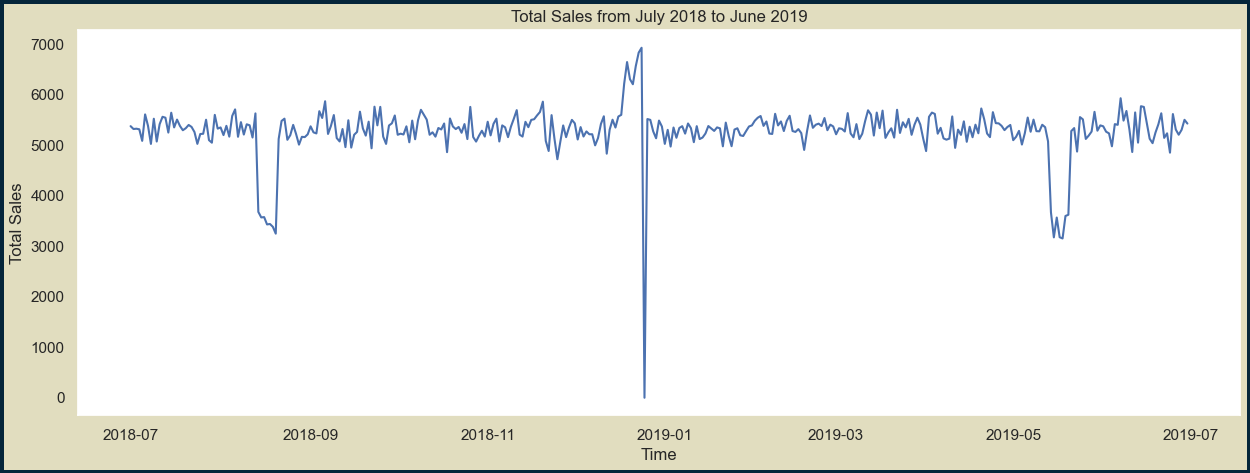

In [103]:
z.index = pd.to_datetime(z.index, errors='coerce')
timeline = z.index
graph = z['Total Sales']

fig, ax = plt.subplots(figsize = (15, 5), linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

ax.plot(timeline, graph)

ax.set_facecolor("#ffffff")

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

In [104]:
z_december = z[(z.index < "2019-01-01") & (z.index > "2018-11-30")]
z_december.head()

,Total Sales
Date,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


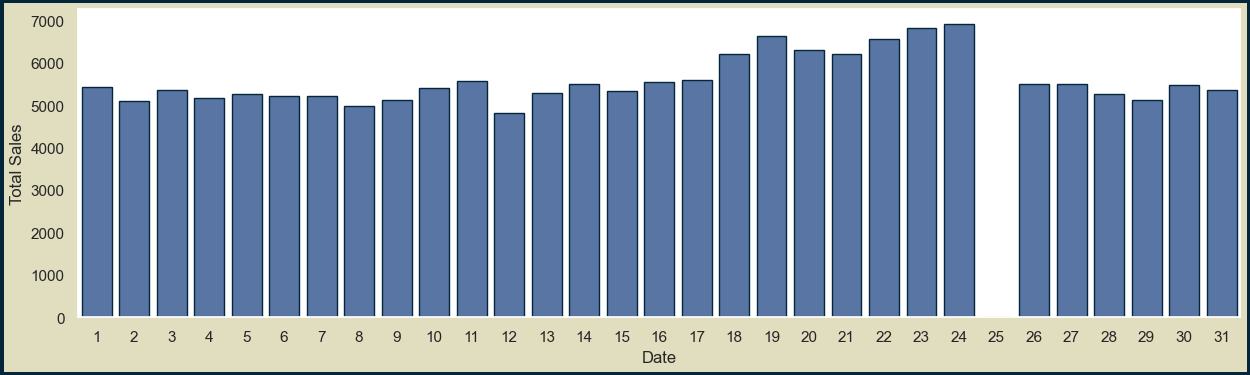

In [121]:
z_december.reset_index(drop = True, inplace=True)
z_december.head()

z_december['Date'] = z_december.index + 1
z_december.head()
fig = plt.figure(linewidth=5, edgecolor='#04253a', facecolor='#e1ddbf')
ax = sns.barplot(x = 'Date', y ='Total Sales', data = z_december,  edgecolor="#04253a")

ax.set_facecolor("#ffffff")

## Data analysis on customer segments

In [105]:
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264182,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,YOUNG SINGLES/COUPLES,Premium
264183,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,YOUNG SINGLES/COUPLES,Premium
264184,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,YOUNG SINGLES/COUPLES,Premium
264185,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,YOUNG SINGLES/COUPLES,Premium


In [106]:
df4['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54342
RETIREES                  49656
OLDER FAMILIES            48448
YOUNG FAMILIES            43472
YOUNG SINGLES/COUPLES     36314
MIDAGE SINGLES/COUPLES    25046
NEW FAMILIES               6909
Name: count, dtype: int64

In [107]:
df4['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101740
Budget         92919
Premium        69528
Name: count, dtype: int64

<Figure size 1500x400 with 0 Axes>

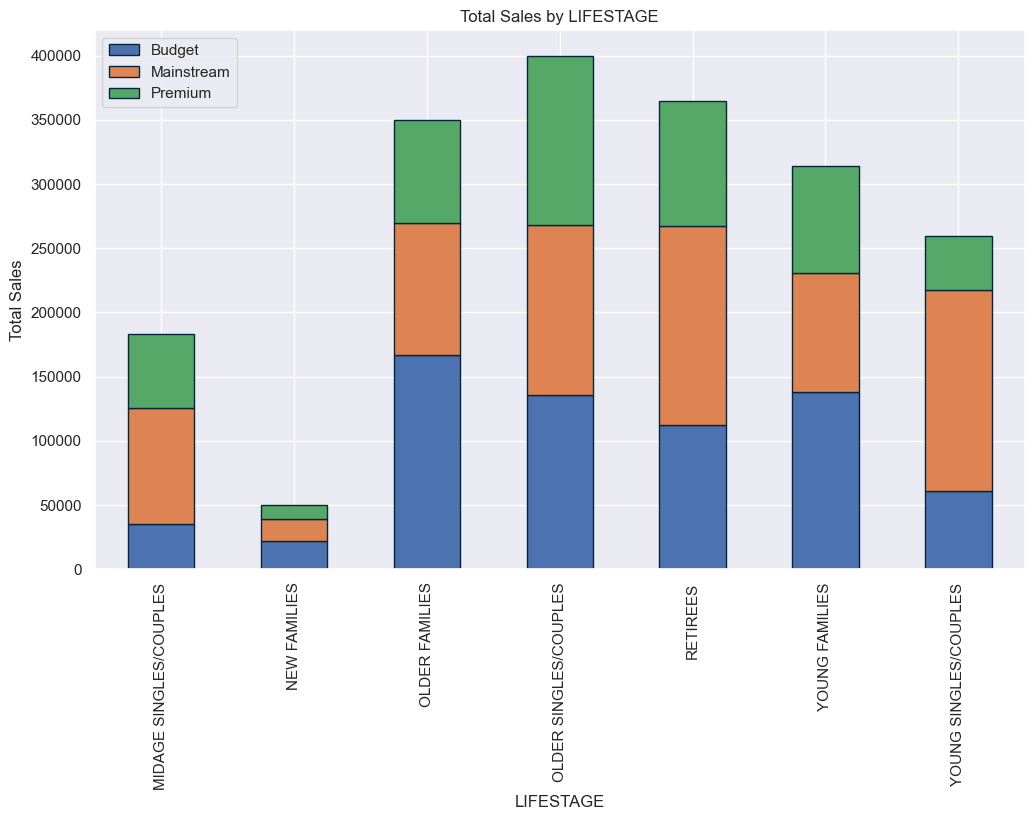

In [108]:
df8 = pd.DataFrame(df4.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())

fig = plt.figure(linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

df8.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by LIFESTAGE' , edgecolor="#04253a")

plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [109]:
df9 = pd.DataFrame(df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
df9.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
df9 = df9.sort_values(by = 'Number of Customers', ascending = False).head(10)
df9

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8074
                 RETIREES                              6478
                 OLDER SINGLES/COUPLES                 4924
Budget           OLDER SINGLES/COUPLES                 4924
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4669
                 RETIREES                              4450
                 YOUNG FAMILIES                        4015
Premium          RETIREES                              3871
Budget           YOUNG SINGLES/COUPLES                 3774

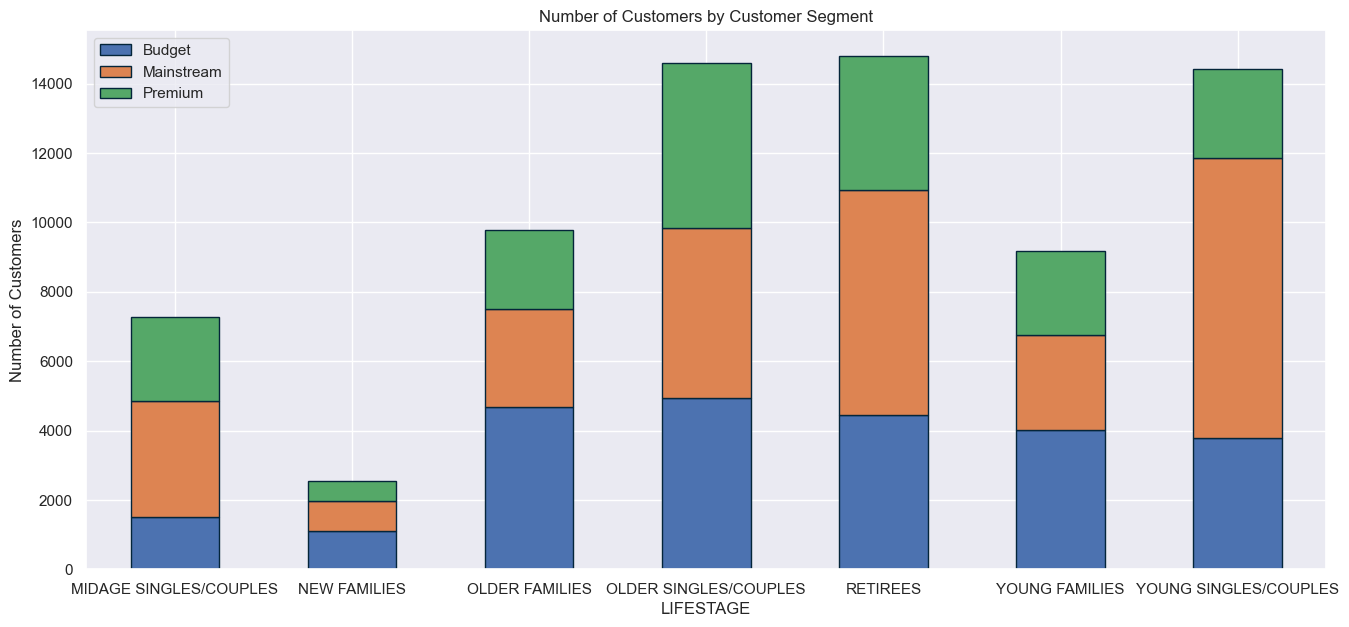

In [110]:
df9 = pd.DataFrame(df4.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
df9.unstack().plot(kind='bar', stacked = True , rot=0 , figsize = (16, 7), title = 'Number of Customers by Customer Segment',  edgecolor="#04253a")
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [111]:
# Calculate average units per customer
df10 = df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()

# Convert the result to a DataFrame, using a list for columns
df10 = pd.DataFrame(df10, columns=['Average Unit per Customer'])

# Sort values based on the 'Average Unit per Customer' and display the top results
df10_sorted = df10.sort_values(by='Average Unit per Customer', ascending=False).head()

print(df10_sorted)


                                 Average Unit per Customer
PREMIUM_CUSTOMER LIFESTAGE                                
Mainstream       OLDER FAMILIES                   9.728011
Budget           OLDER FAMILIES                   9.592632
Premium          OLDER FAMILIES                   9.511004
Budget           YOUNG FAMILIES                   9.184309
Premium          YOUNG FAMILIES                   9.162896


## The Average chip price by customer segment

In [123]:

df11 = df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()

df11 = pd.DataFrame(df11, columns=['Price per Unit'])

df11_sorted = df11.sort_values(by='Price per Unit', ascending=False).head()

print(df11_sorted)


                                         Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.078375
                 MIDAGE SINGLES/COUPLES        3.997379
                 NEW FAMILIES                  3.938700
Budget           NEW FAMILIES                  3.933714
                 RETIREES                      3.930116


In [112]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = df4

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget,4.60
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget,5.10


In [113]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = df4

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget,4.60
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget,5.10


In [151]:
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget,4.60
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,MIDAGE SINGLES/COUPLES,Budget,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...
264182,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,YOUNG SINGLES/COUPLES,Premium,5.40
264183,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,YOUNG SINGLES/COUPLES,Premium,4.40
264184,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,YOUNG SINGLES/COUPLES,Premium,4.40
264185,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,YOUNG SINGLES/COUPLES,Premium,3.90


In [152]:
dfa = df4[(df4['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df4['PREMIUM_CUSTOMER'] == 'Mainstream')]
dfb = df4[(df4['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (df4['PREMIUM_CUSTOMER'] != 'Mainstream')]

In [153]:
dfa_quantity = dfa['PROD_QTY'].sum()
dfa_quantity

38456

In [154]:
dfb_quantity = dfb['PROD_QTY'].sum()
dfb_quantity

281080

In [155]:
print(dfa.columns)


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'pack_size', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'PRICE'],
      dtype='object')


In [156]:
dfa_quantity_brand = dfa.groupby(['PROD_NAME'])['PROD_QTY'].sum()
dfa_quantity_brand

PROD_NAME
Burger Rings 220g                         106
CCs Nacho Cheese    175g                  148
CCs Original 175g                         144
CCs Tasty Cheese    175g                  113
Cheetos Chs & Bacon Balls 190g            168
                                         ... 
WW Sour Cream &OnionStacked Chips 160g    114
WW Supreme Cheese   Corn Chips 200g       116
Woolworths Cheese   Rings 190g            103
Woolworths Medium   Salsa 300g             85
Woolworths Mild     Salsa 300g            131
Name: PROD_QTY, Length: 114, dtype: int64

In [158]:
dfa_quantity_pack = dfa.groupby(['pack_size'])['PROD_QTY'].sum()
dfb_quantity_pack = dfb.groupby(['pack_size'])['PROD_QTY'].sum()

In [159]:
dfa_affinity_pack = dfa_quantity_pack/dfa_quantity
dfb_affinity_pack = dfb_quantity_pack/dfb_quantity

affinity_pack = (dfa_affinity_pack/dfb_affinity_pack).sort_values(ascending = False)

df_affinity_pack = pd.DataFrame({'Pack Size':affinity_pack.index, 'Affinity':affinity_pack.values})
df_affinity_pack

,Pack Size,Affinity
0,270,1.283991
1,380,1.260045
2,330,1.217271
3,110,1.194071
4,134,1.188778
5,210,1.180922
6,135,1.134436
7,250,1.119808
8,170,1.016578
9,300,0.968127


In [160]:
Product_name = df4[(df4['pack_size'] == '270')]['PROD_NAME']
                   
Product_name.unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

In [161]:
Product_name_least = df4[(df4['pack_size'] == '220')]['PROD_NAME']
                   
Product_name_least.unique()


array(['Burger Rings 220g'], dtype=object)